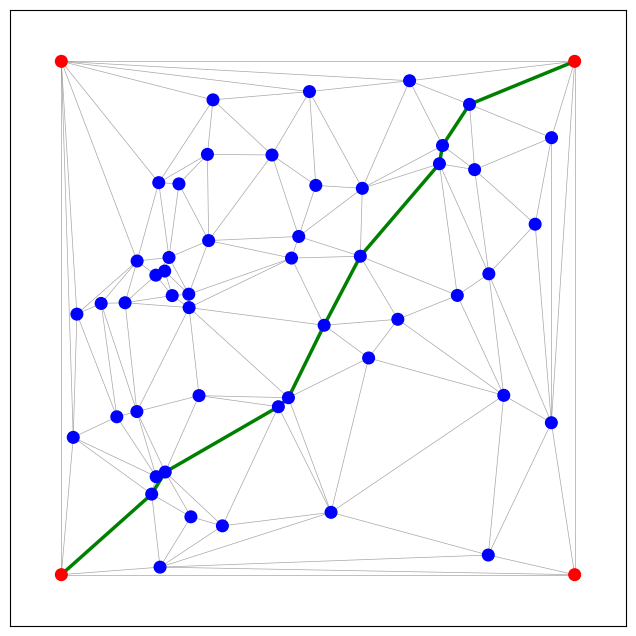

In [4]:
from src.point_generator import generate_points
from src.graph_builder import build_graph
from src.visualizer import draw_graph_with_shortest_path

# 1. Generate points
num_random_points = 50
points, fixed_node_indices = generate_points(num_random_points)

# 2. Build graph
G = build_graph(points)

# 4. Visualize graph with shortest path
draw_graph_with_shortest_path(G, points, fixed_node_indices)
